In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
filedir = 'data/analysis_crime_seoul'

In [3]:
filenames = os.listdir(filedir)
filenames

['2000년.csv',
 '2001년.csv',
 '2002년.csv',
 '2003년.csv',
 '2004년.csv',
 '2005년.csv',
 '2006년.csv',
 '2007년.csv',
 '2008년.csv',
 '2009년.csv',
 '2010년.csv',
 '2011년.csv',
 '2012년.csv',
 '2013년.csv',
 '2014년.csv',
 '2015년.csv',
 '2016년.csv',
 '2017년.csv',
 '2018년.csv',
 'modified',
 'norm']

In [4]:
file = "2018년.csv"

_crime_anal_police = pd.read_csv("{}/{}".format(filedir, file), encoding= 'cp949',na_values='del')
_crime_anal_police.dropna(inplace=True)

In [5]:
police_station = _crime_anal_police['구분'].unique()
police_station

array(['중부', '종로', '남대문', '서대문', '혜화', '용산', '성북', '동대문', '마포', '영등포',
       '성동', '동작', '광진', '서부', '강북', '금천', '중랑', '강남', '관악', '강서', '강동',
       '종암', '구로', '서초', '양천', '송파', '노원', '방배', '은평', '도봉', '수서'],
      dtype=object)

In [6]:
_crime_anal_police

,구분,죄종,발생검거,건수
0,중부,살인,발생,1
1,중부,살인,검거,1
2,중부,강도,발생,5
3,중부,강도,검거,7
4,중부,강간,발생,132
...,...,...,...,...
305,수서,강간,검거,171
306,수서,절도,발생,984
307,수서,절도,검거,481
308,수서,폭력,발생,1697


In [7]:
crime_name = _crime_anal_police['죄종'].unique()
crime_name

array(['살인', '강도', '강간', '절도', '폭력'], dtype=object)

In [8]:
crime_class = _crime_anal_police['발생검거'].unique()
crime_class

array(['발생', '검거'], dtype=object)

In [9]:
result_list = []
for p in police_station:
    temp_dict = {
        '구분': p
    }
    for n in crime_name:
        for c in crime_class:
            key = n+c
            con1 = _crime_anal_police['구분'] == p
            con2 = _crime_anal_police['죄종'] == n
            con3 = _crime_anal_police['발생검거'] == c
            
            value = _crime_anal_police[con1 & con2 & con3]['건수'].values[0]
            temp_dict[key] = value
    result_list.append(temp_dict)
result_list

[{'구분': '중부',
  '살인발생': 1,
  '살인검거': 1,
  '강도발생': 5,
  '강도검거': 7,
  '강간발생': 132,
  '강간검거': 63,
  '절도발생': 1057,
  '절도검거': 415,
  '폭력발생': 1176,
  '폭력검거': 1010},
 {'구분': '종로',
  '살인발생': 5,
  '살인검거': 4,
  '강도발생': 1,
  '강도검거': 0,
  '강간발생': 136,
  '강간검거': 114,
  '절도발생': 744,
  '절도검거': 398,
  '폭력발생': 1131,
  '폭력검거': 993},
 {'구분': '남대문',
  '살인발생': 1,
  '살인검거': 1,
  '강도발생': 6,
  '강도검거': 4,
  '강간발생': 75,
  '강간검거': 52,
  '절도발생': 798,
  '절도검거': 417,
  '폭력발생': 779,
  '폭력검거': 709},
 {'구분': '서대문',
  '살인발생': 5,
  '살인검거': 4,
  '강도발생': 3,
  '강도검거': 3,
  '강간발생': 206,
  '강간검거': 189,
  '절도발생': 1062,
  '절도검거': 585,
  '폭력발생': 1526,
  '폭력검거': 1235},
 {'구분': '혜화',
  '살인발생': 1,
  '살인검거': 1,
  '강도발생': 2,
  '강도검거': 2,
  '강간발생': 100,
  '강간검거': 58,
  '절도발생': 739,
  '절도검거': 340,
  '폭력발생': 831,
  '폭력검거': 712},
 {'구분': '용산',
  '살인발생': 1,
  '살인검거': 1,
  '강도발생': 3,
  '강도검거': 2,
  '강간발생': 331,
  '강간검거': 285,
  '절도발생': 1096,
  '절도검거': 522,
  '폭력발생': 1980,
  '폭력검거': 1733},
 {'구분': '성북',
  '살인발생': 1,
  '살인검거': 1,
  '강도발생': 

In [10]:
crime_anal_police = pd.DataFrame(result_list)
crime_anal_police.head()

,구분,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거
0,중부,1,1,5,7,132,63,1057,415,1176,1010
1,종로,5,4,1,0,136,114,744,398,1131,993
2,남대문,1,1,6,4,75,52,798,417,779,709
3,서대문,5,4,3,3,206,189,1062,585,1526,1235
4,혜화,1,1,2,2,100,58,739,340,831,712


In [11]:
crime_anal_police['구분'] =  crime_anal_police['구분'].apply(lambda x:"서울"+x+"경찰서")

In [12]:
crime_anal_police

,구분,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거
0,서울중부경찰서,1,1,5,7,132,63,1057,415,1176,1010
1,서울종로경찰서,5,4,1,0,136,114,744,398,1131,993
2,서울남대문경찰서,1,1,6,4,75,52,798,417,779,709
3,서울서대문경찰서,5,4,3,3,206,189,1062,585,1526,1235
4,서울혜화경찰서,1,1,2,2,100,58,739,340,831,712
5,서울용산경찰서,1,1,3,2,331,285,1096,522,1980,1733
6,서울성북경찰서,1,1,0,0,125,90,600,298,886,798
7,서울동대문경찰서,2,2,5,4,145,112,1447,930,2081,1920
8,서울마포경찰서,6,6,6,7,473,396,2011,882,2676,2278
9,서울영등포경찰서,17,15,8,6,391,267,2292,1064,3132,2570


In [13]:
from pprint import pprint
import requests

In [14]:
crime_anal_police

station_address = []  # 주소
station_lng = [] # 경도 (x)
station_lat = [] # 위도 (y)

In [15]:
# search 버전 크롤링

station_address = []  # 주소
station_lng = [] # 경도 (x)
station_lat = [] # 위도 (y)

url = 'https://map.naver.com/v5/api/search'
params = {
    'caller': 'pcweb',
}

for police in crime_anal_police['구분']:
    params['query'] = police
    resp = requests.get(url, params)
    
    data = resp.json()
    geo_info = data['result']['place']['list'][0]
    
    address = geo_info.get('roadAddress')
    
    if not address:
        address = geo_info.get('address')
        
    station_address.append(
        address
    )
    station_lng.append(
        geo_info.get('x')
    )
    station_lat.append(
        geo_info.get('y')
    )


In [16]:
station_address, station_lng, station_lat

(['서울특별시 중구 수표로 27 중부경찰서',
  '서울특별시 종로구 율곡로 46 종로경찰서',
  '서울특별시 중구 남대문로5가 567',
  '서울특별시 서대문구 통일로 113 서대문경찰서',
  '서울특별시 종로구 창경궁로 112-16',
  '서울특별시 용산구 원효로89길 24 용산경찰서',
  '서울특별시 성북구 보문로 170 서울성북경찰서',
  '서울특별시 동대문구 약령시로21길 29 동대문경찰서',
  '서울특별시 마포구 마포대로 183',
  '서울특별시 영등포구 국회대로 608',
  '서울특별시 성동구 왕십리광장로 9 성동경찰서',
  '서울특별시 동작구 노량진로 148 동작경찰서',
  '서울특별시 광진구 구의동 254-32',
  '서울특별시 은평구 진흥로 58',
  '서울특별시 강북구 오패산로 406 서울강북경찰서',
  '서울특별시 금천구 시흥대로73길 50',
  '서울특별시 중랑구 신내동 267-1',
  '서울특별시 강남구 테헤란로114길 11',
  '서울특별시 관악구 관악로5길 33 관악경찰서',
  '서울특별시 양천구 화곡로 73 서울프라자',
  '서울특별시 강동구 성내로 55 강동구의회의사당',
  '서울특별시 성북구 종암로 135 종암경찰서',
  '서울특별시 구로구 가마산로 235 구로경찰서',
  '서울특별시 서초구 반포대로 179 서초경찰서',
  '서울특별시 양천구 목동동로 99 서울양천경찰서',
  '서울특별시 송파구 중대로 221 송파경찰서',
  '서울특별시 노원구 노원로 283 노원경찰서',
  '서울특별시 서초구 동작대로 204 방배경찰서 임시청사',
  '서울특별시 은평구 연서로 365 은평경찰서',
  '서울특별시 도봉구 노해로 403 도봉경찰서',
  '서울특별시 강남구 개포로 617 수서경찰서'],
 ['126.9896139',
  '126.9849292',
  '126.9734874',
  '126.9667850',
  '126.9989318',
  '126.9677732',
  '127.

In [17]:
# # instantSearch
# url = 'https://map.naver.com/v5/api/instantSearch'
# params = {
#     'lang':'ko',
#     'caller': 'pcweb',
#     'types': 'place',
#     'coords': '37.563867960512454,127.00276851654054'
# }

# for police in crime_anal_police['구분']:
#     params['q'] = police
#     resp = requests.get(url, params)

#     print(resp)

### Data 저장하기 (주소, 위도, 경도) p.82 - In[7]

In [18]:
from time import sleep
import random

In [19]:
# instantSearch
url = 'https://map.naver.com/v5/api/instantSearch'
params = {
    'lang':'ko',
    'caller': 'pcweb',
    'types': 'place',
    'coords': '37.563867960512454,127.00276851654054'
    
}

station_address = []
station_lng = []
station_lat = []

for police in crime_anal_police['구분']:
    sleep(random.randint(1, 3))
    
    params['q'] = police
    resp = requests.get(url, params)
    
    station_data = resp.json()
    police_geo = station_data['poi'][0]

    address = police_geo.get('roadAddress', police_geo.get('jibunAddress'))
    station_address.append(address)
    station_lng.append(police_geo.get('x'))
    station_lat.append(police_geo.get('y'))
    
    print(police + "-->" + police_geo.get('roadAddress', address))


서울중부경찰서-->서울특별시 중구 수표로 27 중부경찰서
서울종로경찰서-->서울특별시 종로구 율곡로 46 종로경찰서
서울남대문경찰서-->서울특별시 중구 남대문로5가 567
서울서대문경찰서-->서울특별시 서대문구 통일로 113 서대문경찰서
서울혜화경찰서-->서울특별시 종로구 창경궁로 112-16
서울용산경찰서-->서울특별시 용산구 원효로89길 24 용산경찰서
서울성북경찰서-->서울특별시 성북구 보문로 170 서울성북경찰서
서울동대문경찰서-->서울특별시 동대문구 약령시로21길 29 동대문경찰서
서울마포경찰서-->서울특별시 마포구 마포대로 183
서울영등포경찰서-->서울특별시 영등포구 국회대로 608
서울성동경찰서-->서울특별시 성동구 왕십리광장로 9 성동경찰서
서울동작경찰서-->서울특별시 동작구 노량진로 148 동작경찰서
서울광진경찰서-->서울특별시 광진구 구의동 254-32
서울서부경찰서-->서울특별시 은평구 진흥로 58
서울강북경찰서-->서울특별시 강북구 오패산로 406 서울강북경찰서
서울금천경찰서-->서울특별시 금천구 시흥대로73길 50
서울중랑경찰서-->서울특별시 중랑구 신내동 267-1
서울강남경찰서-->서울특별시 강남구 테헤란로114길 11
서울관악경찰서-->서울특별시 관악구 관악로5길 33 관악경찰서
서울강서경찰서-->서울특별시 양천구 화곡로 73 서울프라자
서울강동경찰서-->서울특별시 강동구 성내로 55 강동구의회의사당
서울종암경찰서-->서울특별시 성북구 종암로 135 종암경찰서
서울구로경찰서-->서울특별시 구로구 가마산로 235 구로경찰서
서울서초경찰서-->서울특별시 서초구 반포대로 179 서초경찰서
서울양천경찰서-->서울특별시 양천구 목동동로 99 서울양천경찰서
서울송파경찰서-->서울특별시 송파구 중대로 221 송파경찰서
서울노원경찰서-->서울특별시 노원구 노원로 283 노원경찰서
서울방배경찰서-->서울특별시 서초구 동작대로 204 방배경찰서 임시청사
서울은평경찰서-->서울특별시 은평구 연서로 365 은평경찰서
서울도봉경찰서-->서울특별시 도봉구

In [20]:
zip(station_address, station_lat, station_lng)

In [21]:
dict(zip(station_address, station_lat))

{'서울특별시 중구 수표로 27 중부경찰서': '37.5635144',
 '서울특별시 종로구 율곡로 46 종로경찰서': '37.5755321',
 '서울특별시 중구 남대문로5가 567': '37.5547667',
 '서울특별시 서대문구 통일로 113 서대문경찰서': '37.5649018',
 '서울특별시 종로구 창경궁로 112-16': '37.5718764',
 '서울특별시 용산구 원효로89길 24 용산경찰서': '37.5412134',
 '서울특별시 성북구 보문로 170 서울성북경찰서': '37.5899114',
 '서울특별시 동대문구 약령시로21길 29 동대문경찰서': '37.5851004',
 '서울특별시 마포구 마포대로 183': '37.5510174',
 '서울특별시 영등포구 국회대로 608': '37.5258476',
 '서울특별시 성동구 왕십리광장로 9 성동경찰서': '37.5618368',
 '서울특별시 동작구 노량진로 148 동작경찰서': '37.5131459',
 '서울특별시 광진구 구의동 254-32': '37.5428366',
 '서울특별시 은평구 진흥로 58': '37.6020717',
 '서울특별시 강북구 오패산로 406 서울강북경찰서': '37.6374119',
 '서울특별시 금천구 시흥대로73길 50': '37.4572441',
 '서울특별시 중랑구 신내동 267-1': '37.6187750',
 '서울특별시 강남구 테헤란로114길 11': '37.5094438',
 '서울특별시 관악구 관악로5길 33 관악경찰서': '37.4745177',
 '서울특별시 양천구 화곡로 73 서울프라자': '37.5397713',
 '서울특별시 강동구 성내로 55 강동구의회의사당': '37.5284841',
 '서울특별시 성북구 종암로 135 종암경찰서': '37.6021470',
 '서울특별시 구로구 가마산로 235 구로경찰서': '37.4948934',
 '서울특별시 서초구 반포대로 179 서초경찰서': '37.4956273',
 '서울특별시 양

In [22]:
list(zip(station_address, station_lat, station_lng))

[('서울특별시 중구 수표로 27 중부경찰서', '37.5635144', '126.9896139'),
 ('서울특별시 종로구 율곡로 46 종로경찰서', '37.5755321', '126.9849292'),
 ('서울특별시 중구 남대문로5가 567', '37.5547667', '126.9734874'),
 ('서울특별시 서대문구 통일로 113 서대문경찰서', '37.5649018', '126.9667850'),
 ('서울특별시 종로구 창경궁로 112-16', '37.5718764', '126.9989318'),
 ('서울특별시 용산구 원효로89길 24 용산경찰서', '37.5412134', '126.9677732'),
 ('서울특별시 성북구 보문로 170 서울성북경찰서', '37.5899114', '127.0160834'),
 ('서울특별시 동대문구 약령시로21길 29 동대문경찰서', '37.5851004', '127.0457643'),
 ('서울특별시 마포구 마포대로 183', '37.5510174', '126.9539447'),
 ('서울특별시 영등포구 국회대로 608', '37.5258476', '126.9009426'),
 ('서울특별시 성동구 왕십리광장로 9 성동경찰서', '37.5618368', '127.0364909'),
 ('서울특별시 동작구 노량진로 148 동작경찰서', '37.5131459', '126.9428596'),
 ('서울특별시 광진구 구의동 254-32', '37.5428366', '127.0838753'),
 ('서울특별시 은평구 진흥로 58', '37.6020717', '126.9212207'),
 ('서울특별시 강북구 오패산로 406 서울강북경찰서', '37.6374119', '127.0273396'),
 ('서울특별시 금천구 시흥대로73길 50', '37.4572441', '126.8966992'),
 ('서울특별시 중랑구 신내동 267-1', '37.6187750', '127.1045567'),
 ('서울특별시 강남구 테헤란

###### 구 분류하기 (p.85)

In [23]:
crime_anal_police.head()

,구분,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거
0,서울중부경찰서,1,1,5,7,132,63,1057,415,1176,1010
1,서울종로경찰서,5,4,1,0,136,114,744,398,1131,993
2,서울남대문경찰서,1,1,6,4,75,52,798,417,779,709
3,서울서대문경찰서,5,4,3,3,206,189,1062,585,1526,1235
4,서울혜화경찰서,1,1,2,2,100,58,739,340,831,712


In [24]:
# 책의 코드
gu_name = []
for name in station_address:
    tmp = name.split()
    
    tmp_gu = [gu for gu in tmp if gu[-1] == '구'][0]
    
    gu_name.append(tmp_gu)
crime_anal_police['구별'] = gu_name

# or 다음과 같이도 가능
gu_name = []
for name in station_address:
    tmp = name.split()
    gu_name.append(tmp[1])
crime_anal_police['구별'] = gu_name

In [25]:
crime_anal_police

,구분,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거,구별
0,서울중부경찰서,1,1,5,7,132,63,1057,415,1176,1010,중구
1,서울종로경찰서,5,4,1,0,136,114,744,398,1131,993,종로구
2,서울남대문경찰서,1,1,6,4,75,52,798,417,779,709,중구
3,서울서대문경찰서,5,4,3,3,206,189,1062,585,1526,1235,서대문구
4,서울혜화경찰서,1,1,2,2,100,58,739,340,831,712,종로구
5,서울용산경찰서,1,1,3,2,331,285,1096,522,1980,1733,용산구
6,서울성북경찰서,1,1,0,0,125,90,600,298,886,798,성북구
7,서울동대문경찰서,2,2,5,4,145,112,1447,930,2081,1920,동대문구
8,서울마포경찰서,6,6,6,7,473,396,2011,882,2676,2278,마포구
9,서울영등포경찰서,17,15,8,6,391,267,2292,1064,3132,2570,영등포구


###### 형식 동일하게 만들기 (구분 -> 관서별)

In [26]:
crime_anal_police.rename(columns={
    '구분': '관서명'
})

,관서명,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거,구별
0,서울중부경찰서,1,1,5,7,132,63,1057,415,1176,1010,중구
1,서울종로경찰서,5,4,1,0,136,114,744,398,1131,993,종로구
2,서울남대문경찰서,1,1,6,4,75,52,798,417,779,709,중구
3,서울서대문경찰서,5,4,3,3,206,189,1062,585,1526,1235,서대문구
4,서울혜화경찰서,1,1,2,2,100,58,739,340,831,712,종로구
5,서울용산경찰서,1,1,3,2,331,285,1096,522,1980,1733,용산구
6,서울성북경찰서,1,1,0,0,125,90,600,298,886,798,성북구
7,서울동대문경찰서,2,2,5,4,145,112,1447,930,2081,1920,동대문구
8,서울마포경찰서,6,6,6,7,473,396,2011,882,2676,2278,마포구
9,서울영등포경찰서,17,15,8,6,391,267,2292,1064,3132,2570,영등포구


###### 수정한 파일 저장. (p.87) - In [14]

In [27]:
file

'2018년.csv'

In [29]:
if not os.path.exists(filedir+'/modified'):
    os.makedirs(filedir+'/modified')

In [30]:
modified_file = "modified/{}".format(file)

In [31]:
crime_anal_police.to_csv("{}/{}".format(filedir, modified_file), sep=',', encoding='utf-8') # windows는 cp949 (euc-kr)

In [32]:
crime_anal_police['구별'].value_counts()

성북구     2
강남구     2
양천구     2
서초구     2
중구      2
은평구     2
종로구     2
도봉구     1
노원구     1
동대문구    1
동작구     1
영등포구    1
마포구     1
광진구     1
관악구     1
강동구     1
중랑구     1
강북구     1
송파구     1
서대문구    1
용산구     1
금천구     1
구로구     1
성동구     1
Name: 구별, dtype: int64

### [강남구, 종로구, 성북구, 서초구, 양천구, 중구, 은평구]가 두번 등장
### 구별로 정리하기 위해서는?!

## 2-5. Pandas의 pivot_table(p.87)  - 연습하기

##### pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, margins_name='All')
- data: 분석할 데이터프레임 (메서드일 때는 필요하지 않음)  
- values: 분석할 데이터프레임에서 분석할 열  
- index: 행 인덱스로 들어갈 키 열 또는 키 열의 리스트  
- columns: 열 인덱스로 들어갈 키 열 또는 키 열의 리스트  
- aggfunc: 분석 메서드
- fill_value: NaN 대체 값
- margins: 모든 데이터를 분석한 결과를 오른쪽과 아래에 붙일지 여부
- margins_name: 마진 열(행)의 이름


In [33]:
df = crime_anal_police.copy()

In [34]:
df.head()

,구분,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거,구별
0,서울중부경찰서,1,1,5,7,132,63,1057,415,1176,1010,중구
1,서울종로경찰서,5,4,1,0,136,114,744,398,1131,993,종로구
2,서울남대문경찰서,1,1,6,4,75,52,798,417,779,709,중구
3,서울서대문경찰서,5,4,3,3,206,189,1062,585,1526,1235,서대문구
4,서울혜화경찰서,1,1,2,2,100,58,739,340,831,712,종로구


### index 지정 1개. (숫자형 데이터만 남음), aggfunc(aggregated function)을 지정하지 않으면 default: 평균

In [35]:
# index를 지정하지 않았다면, 숫자형 데이터만 남음.
pd.pivot_table(df, index=['구별'])

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구별,,,,,,,,,,
강남구,261.5,300.0,5.0,7.0,6.5,5.0,658.5,1502.0,1666.5,1942.5
강동구,143.0,170.0,7.0,7.0,3.0,3.0,765.0,1515.0,1871.0,2224.0
강북구,135.0,188.0,7.0,7.0,6.0,8.0,603.0,1112.0,1992.0,2122.0
관악구,305.0,352.0,12.0,10.0,9.0,9.0,1025.0,2012.0,2302.0,2643.0
광진구,184.0,229.0,1.0,2.0,5.0,7.0,974.0,1769.0,1625.0,1908.0
구로구,181.0,250.0,9.0,9.0,8.0,8.0,787.0,1717.0,2353.0,2826.0
금천구,185.0,200.0,6.0,7.0,6.0,6.0,645.0,1168.0,1725.0,1912.0
노원구,173.0,194.0,5.0,5.0,4.0,5.0,585.0,1422.0,1958.0,2381.0
도봉구,117.0,113.0,3.0,5.0,1.0,1.0,431.0,781.0,1124.0,1349.0


#### index를 지정하지 않으면 숫자형 데이터만 남음.

### index 여러개 지정. - Index지정 순서가 pivot의 영향을 끼침. 

In [36]:
pd.pivot_table(crime_anal_police, index=['구별','구분'])

강간검거  강간발생  강도검거  강도발생  살인검거  살인발생  절도검거  절도발생  폭력검거  폭력발생
구별   구분                                                                  
강남구  서울강남경찰서    352   406     8     9     8     5   836  2020  1890  2188
     서울수서경찰서    171   194     2     5     5     5   481   984  1443  1697
강동구  서울강동경찰서    143   170     7     7     3     3   765  1515  1871  2224
강북구  서울강북경찰서    135   188     7     7     6     8   603  1112  1992  2122
관악구  서울관악경찰서    305   352    12    10     9     9  1025  2012  2302  2643
광진구  서울광진경찰서    184   229     1     2     5     7   974  1769  1625  1908
구로구  서울구로경찰서    181   250     9     9     8     8   787  1717  2353  2826
금천구  서울금천경찰서    185   200     6     7     6     6   645  1168  1725  1912
노원구  서울노원경찰서    173   194     5     5     4     5   585  1422  1958  2381
도봉구  서울도봉경찰서    117   113     3     5     1     1   431   781  1124  1349
동대문구 서울동대문경찰서   112   145     4     5     2     2   930  1447  1920  2081
동작구  서울동작경찰서    154   288     7     7     3     3   532  1151  1394  1651
마포구  서울마포경찰서    396   473     7     6     6     6   882  2011  2278  2676
서대문구 서울서대문경찰서   189   206     3     3     4     5   585  1062  1235  1526
서초구  서울방배경찰서     41    63     1     1     0     0   165   369   423   487
     서울서초경찰서    274   407     4     4     5     5   673  1482  1597  1908
성동구  서울성동경찰서    102   126     8     5     2     2   487   999  1188  1325
성북구  서울성북경찰서     90   125     0     0     1     1   298   600   798   886
     서울종암경찰서     50    58     2     1     5     6   337   564   696   801
송파구  서울송파경찰서    254   309     8     6     6     5  1034  2352  2749  3135
양천구  서울강서경찰서    246   269     3     6     9    11   982  1724  2229  2619
     서울양천경찰서    111   120    14     4     3     2   646  1384  1685  2005
영등포구 서울영등포경찰서   267   391     6     8    15    17  1064  2292  2570  3132
용산구  서울용산경찰서    285   331     2     3     1     1   522  1096  1733  1980
은평구  서울서부경찰서     52    58     0     0     4     4   325   505   711   807
     서울은평경찰서    117   130     1     1     4     4   491   773  1158  1308
종로구  서울종로경찰서    114   136     0     1     4     5   398   744   993  1131
     서울혜화경찰서     58   100     2     2     1     1   340   739   712   831
중구   서울남대문경찰서    52    75     4     6     1     1   417   798   709   779
     서울중부경찰서     63   132     7     5     1     1   415  1057  1010  1176
중랑구  서울중랑경찰서    145   174     3     3     5     4   876  1526  2193  2581

### values 지정. (특정 값만 남기기)

In [37]:
pd.pivot_table(df, index=['구별', '구분'], values=['절도검거', '절도발생'])

절도검거  절도발생
구별   구분                  
강남구  서울강남경찰서    836  2020
     서울수서경찰서    481   984
강동구  서울강동경찰서    765  1515
강북구  서울강북경찰서    603  1112
관악구  서울관악경찰서   1025  2012
광진구  서울광진경찰서    974  1769
구로구  서울구로경찰서    787  1717
금천구  서울금천경찰서    645  1168
노원구  서울노원경찰서    585  1422
도봉구  서울도봉경찰서    431   781
동대문구 서울동대문경찰서   930  1447
동작구  서울동작경찰서    532  1151
마포구  서울마포경찰서    882  2011
서대문구 서울서대문경찰서   585  1062
서초구  서울방배경찰서    165   369
     서울서초경찰서    673  1482
성동구  서울성동경찰서    487   999
성북구  서울성북경찰서    298   600
     서울종암경찰서    337   564
송파구  서울송파경찰서   1034  2352
양천구  서울강서경찰서    982  1724
     서울양천경찰서    646  1384
영등포구 서울영등포경찰서  1064  2292
용산구  서울용산경찰서    522  1096
은평구  서울서부경찰서    325   505
     서울은평경찰서    491   773
종로구  서울종로경찰서    398   744
     서울혜화경찰서    340   739
중구   서울남대문경찰서   417   798
     서울중부경찰서    415  1057
중랑구  서울중랑경찰서    876  1526

### aggfunc 지정하기

In [38]:
pd.pivot_table(df, index=['구별'], values=['절도검거', '절도발생'], aggfunc=np.max) # 강남구 -> (강남경찰서, 수서경찰서 max값)

# 위와 아래는 동일한 작동을 하지만 내부적 연산 속도에 차이 발생. (numpy 속도 빠름)
# pd.pivot_table(df, index=['구별'], values=['절도검거', '절도발생'], aggfunc=max)

,절도검거,절도발생
구별,,
강남구,836,2020
강동구,765,1515
강북구,603,1112
관악구,1025,2012
광진구,974,1769
구로구,787,1717
금천구,645,1168
노원구,585,1422
도봉구,431,781


### aggfunc 여러개 지정하기

In [39]:
# 강남구 -> (강남경찰서, 수서경찰서 합계 및 평균)
# MultiIndex columns
pd.pivot_table(df, index=['구별'], values=['절도검거', '절도발생'], aggfunc=[np.max, np.mean,np.min])


amax          mean          amin      
      절도검거  절도발생    절도검거    절도발생  절도검거  절도발생
구별                                          
강남구    836  2020   658.5  1502.0   481   984
강동구    765  1515   765.0  1515.0   765  1515
강북구    603  1112   603.0  1112.0   603  1112
관악구   1025  2012  1025.0  2012.0  1025  2012
광진구    974  1769   974.0  1769.0   974  1769
구로구    787  1717   787.0  1717.0   787  1717
금천구    645  1168   645.0  1168.0   645  1168
노원구    585  1422   585.0  1422.0   585  1422
도봉구    431   781   431.0   781.0   431   781
동대문구   930  1447   930.0  1447.0   930  1447
동작구    532  1151   532.0  1151.0   532  1151
마포구    882  2011   882.0  2011.0   882  2011
서대문구   585  1062   585.0  1062.0   585  1062
서초구    673  1482   419.0   925.5   165   369
성동구    487   999   487.0   999.0   487   999
성북구    337   600   317.5   582.0   298   564
송파구   1034  2352  1034.0  2352.0  1034  2352
양천구    982  1724   814.0  1554.0   646  1384
영등포구  1064  2292  1064.0  2292.0  1064  2292
용산구    522  1096   522.0  1096.0   522  1096
은평구    491   773   408.0   639.0   325   505
종로구    398   744   369.0   741.5   340   739
중구     417  1057   416.0   927.5   415   798
중랑구    876  1526   876.0  1526.0   876  1526

### pivot_table 최종 (+ NA값 처리 / margin - 총계)

In [40]:
def temp_func(value):
    print(value)

In [41]:
pd.pivot_table(df, index=['구별'], values=['절도검거', '절도발생'], aggfunc=[np.max, np.mean, np.min,], fill_value=0)

amax          mean          amin      
      절도검거  절도발생    절도검거    절도발생  절도검거  절도발생
구별                                          
강남구    836  2020   658.5  1502.0   481   984
강동구    765  1515   765.0  1515.0   765  1515
강북구    603  1112   603.0  1112.0   603  1112
관악구   1025  2012  1025.0  2012.0  1025  2012
광진구    974  1769   974.0  1769.0   974  1769
구로구    787  1717   787.0  1717.0   787  1717
금천구    645  1168   645.0  1168.0   645  1168
노원구    585  1422   585.0  1422.0   585  1422
도봉구    431   781   431.0   781.0   431   781
동대문구   930  1447   930.0  1447.0   930  1447
동작구    532  1151   532.0  1151.0   532  1151
마포구    882  2011   882.0  2011.0   882  2011
서대문구   585  1062   585.0  1062.0   585  1062
서초구    673  1482   419.0   925.5   165   369
성동구    487   999   487.0   999.0   487   999
성북구    337   600   317.5   582.0   298   564
송파구   1034  2352  1034.0  2352.0  1034  2352
양천구    982  1724   814.0  1554.0   646  1384
영등포구  1064  2292  1064.0  2292.0  1064  2292
용산구    522  1096   522.0  1096.0   522  1096
은평구    491   773   408.0   639.0   325   505
종로구    398   744   369.0   741.5   340   739
중구     417  1057   416.0   927.5   415   798
중랑구    876  1526   876.0  1526.0   876  1526

In [42]:
pd.pivot_table?

In [43]:
# 강남구 -> (강남경찰서, 수서경찰서 합계 및 평균)
# MultiIndex columns
pd.pivot_table(df, 
               index=['구별'], 
               values=['절도검거', '절도발생'], 
               aggfunc=[np.max, np.mean], 
               fill_value=0, 
               margins=True, 
               margins_name="총계")

amax               mean             
      절도검거  절도발생         절도검거         절도발생
구별                                        
강남구    836  2020   658.500000  1502.000000
강동구    765  1515   765.000000  1515.000000
강북구    603  1112   603.000000  1112.000000
관악구   1025  2012  1025.000000  2012.000000
광진구    974  1769   974.000000  1769.000000
구로구    787  1717   787.000000  1717.000000
금천구    645  1168   645.000000  1168.000000
노원구    585  1422   585.000000  1422.000000
도봉구    431   781   431.000000   781.000000
동대문구   930  1447   930.000000  1447.000000
동작구    532  1151   532.000000  1151.000000
마포구    882  2011   882.000000  2011.000000
서대문구   585  1062   585.000000  1062.000000
서초구    673  1482   419.000000   925.500000
성동구    487   999   487.000000   999.000000
성북구    337   600   317.500000   582.000000
송파구   1034  2352  1034.000000  2352.000000
양천구    982  1724   814.000000  1554.000000
영등포구  1064  2292  1064.000000  2292.000000
용산구    522  1096   522.000000  1096.000000
은평구    491   773   408.000000   639.000000
종로구    398   744   369.000000   741.500000
중구     417  1057   416.000000   927.500000
중랑구    876  1526   876.000000  1526.000000
총계    1064  2352   630.032258  1263.709677

## 2-6. Pivot_table을 이용해서 데이터 정리하기

In [44]:
crime_anal_police.head()

,구분,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거,구별
0,서울중부경찰서,1,1,5,7,132,63,1057,415,1176,1010,중구
1,서울종로경찰서,5,4,1,0,136,114,744,398,1131,993,종로구
2,서울남대문경찰서,1,1,6,4,75,52,798,417,779,709,중구
3,서울서대문경찰서,5,4,3,3,206,189,1062,585,1526,1235,서대문구
4,서울혜화경찰서,1,1,2,2,100,58,739,340,831,712,종로구


### 예제1. pivot_table을 이용해서 crime_anal_police데이터의 구별로 데이터를 정리하고 합계를 표시하시오. 그 결과를 crime_anal로 저장하시오.

### 예제2. crime_anal의 각 범죄의 검거와 발생을 가지고 각각 [<범죄>검거율] 을 입력하시오. 단, 100이 넘어가면 100으로 변경하시오. 그 후 기존 [<범죄>검거] 데이터는 삭제하시오.

### 예제3. [<범죄>발생] columns의 "발생" 이라는 단어를 제거하시오. (절도발생 --> 절도)

In [45]:
# 예제1. 
crime_anal = pd.pivot_table(crime_anal_police, index=['구별'], aggfunc=np.sum)
crime_anal.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구별,,,,,,,,,,
강남구,523,600,10,14,13,10,1317,3004,3333,3885
강동구,143,170,7,7,3,3,765,1515,1871,2224
강북구,135,188,7,7,6,8,603,1112,1992,2122
관악구,305,352,12,10,9,9,1025,2012,2302,2643
광진구,184,229,1,2,5,7,974,1769,1625,1908


In [46]:
crime_anal['강간검거']

구별
강남구     523
강동구     143
강북구     135
관악구     305
광진구     184
구로구     181
금천구     185
노원구     173
도봉구     117
동대문구    112
동작구     154
마포구     396
서대문구    189
서초구     315
성동구     102
성북구     140
송파구     254
양천구     357
영등포구    267
용산구     285
은평구     169
종로구     172
중구      115
중랑구     145
Name: 강간검거, dtype: int64

In [47]:
crime_anal

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구별,,,,,,,,,,
강남구,523,600,10,14,13,10,1317,3004,3333,3885
강동구,143,170,7,7,3,3,765,1515,1871,2224
강북구,135,188,7,7,6,8,603,1112,1992,2122
관악구,305,352,12,10,9,9,1025,2012,2302,2643
광진구,184,229,1,2,5,7,974,1769,1625,1908
구로구,181,250,9,9,8,8,787,1717,2353,2826
금천구,185,200,6,7,6,6,645,1168,1725,1912
노원구,173,194,5,5,4,5,585,1422,1958,2381
도봉구,117,113,3,5,1,1,431,781,1124,1349


In [48]:
crime_name_list = ['강간', '강도', '살인', '절도', '폭력']

for crime_name in crime_name_list:
    
    temp_series = crime_anal.loc[:, crime_name+"검거"] / crime_anal.loc[:, crime_name+"발생"] * 100

    temp_series[temp_series>100] = 100
    
    crime_anal[crime_name+"검거율"] = temp_series

    crime_anal.drop(crime_name+"검거", axis=1, inplace=True)

    # 아래도 가능
    # del crim_anal[crime_name+"검거"]


#### 발생이라는 단어 삭제 p.93

In [49]:
# 예제3
# zip이라는 함수는?
column_names = dict(zip([i + "발생" for i in crime_name_list], crime_name_list))
column_names

{'강간발생': '강간', '강도발생': '강도', '살인발생': '살인', '절도발생': '절도', '폭력발생': '폭력'}

In [50]:
crime_anal.rename(columns = column_names, inplace=True)

In [51]:
crime_anal.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,600,14,10,3004,3885,87.166667,71.428571,100.000000,43.841545,85.791506
강동구,170,7,3,1515,2224,84.117647,100.000000,100.000000,50.495050,84.127698
강북구,188,7,8,1112,2122,71.808511,100.000000,75.000000,54.226619,93.873704
관악구,352,10,9,2012,2643,86.647727,100.000000,100.000000,50.944334,87.097995
광진구,229,2,7,1769,1908,80.349345,50.000000,71.428571,55.059356,85.167715


### 데이터 분포도 보기

In [52]:
crime_anal.describe()
# 데이터의 분포도가 각각 다르다. --> 스케일링 필요 --> 정규화 or 표준화 (예- 살인과 폭력에 비교)
# 살인과 폭력

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,267.166667,5.958333,5.958333,1632.291667,2336.458333,80.202129,89.811508,94.000799,50.676009,86.270528
std,124.101875,3.263489,3.804793,602.553153,777.722203,11.414771,15.984097,9.456987,6.190770,3.209737
min,113.000000,1.000000,1.000000,781.000000,1325.000000,53.472222,50.000000,71.428571,41.139241,80.930537
25%,186.750000,3.000000,3.000000,1160.750000,1911.000000,72.761017,78.750000,87.605042,45.695026,84.288709
50%,218.000000,5.500000,5.500000,1499.000000,2118.500000,82.766990,100.000000,100.000000,50.129521,85.479610
75%,336.250000,7.250000,8.000000,1894.000000,2651.250000,87.668814,100.000000,100.000000,55.065703,88.038490
max,600.000000,14.000000,17.000000,3108.000000,4624.000000,100.000000,100.000000,100.000000,64.270905,93.873704


## 2-7. 데이터 표현을 위해 다듬기

#### - 정규화

In [53]:
# In[33]
from sklearn.preprocessing import MinMaxScaler

In [54]:
col = ['강간', '강도', '살인', '절도', '폭력']

In [55]:
x = crime_anal[col].values
min_max_scaler = MinMaxScaler()

# 변환기는 fit과 transform 함수 내장. (합친게 fit_transform)
# fit은 변환할 값 저장
# transform은 값 변환
x_scaled = min_max_scaler.fit_transform(x.astype(float))

# 오리지널 데이터, 스케일된 데이터
x, x_scaled

(array([[ 600,   14,   10, 3004, 3885],
        [ 170,    7,    3, 1515, 2224],
        [ 188,    7,    8, 1112, 2122],
        [ 352,   10,    9, 2012, 2643],
        [ 229,    2,    7, 1769, 1908],
        [ 250,    9,    8, 1717, 2826],
        [ 200,    7,    6, 1168, 1912],
        [ 194,    5,    5, 1422, 2381],
        [ 113,    5,    1,  781, 1349],
        [ 145,    5,    2, 1447, 2081],
        [ 288,    7,    3, 1151, 1651],
        [ 473,    6,    6, 2011, 2676],
        [ 206,    3,    5, 1062, 1526],
        [ 470,    5,    5, 1851, 2395],
        [ 126,    5,    2,  999, 1325],
        [ 183,    1,    7, 1164, 1687],
        [ 309,    6,    5, 2352, 3135],
        [ 389,   10,   13, 3108, 4624],
        [ 391,    8,   17, 2292, 3132],
        [ 331,    3,    1, 1096, 1980],
        [ 188,    1,    8, 1278, 2115],
        [ 236,    3,    6, 1483, 1962],
        [ 207,   11,    2, 1855, 1955],
        [ 174,    3,    4, 1526, 2581]], dtype=int64),
 array([[1.        , 1.  

In [56]:
# 정규화된 anal_norm data
crime_anal_norm = pd.DataFrame(x_scaled, columns=col, index=crime_anal.index)
crime_anal_norm

,강간,강도,살인,절도,폭력
구별,,,,,
강남구,1.000000,1.000000,0.5625,0.955307,0.775993
강동구,0.117043,0.461538,0.1250,0.315428,0.272507
강북구,0.154004,0.461538,0.4375,0.142243,0.241588
관악구,0.490760,0.692308,0.5000,0.529007,0.399515
광진구,0.238193,0.076923,0.3750,0.424581,0.176720
구로구,0.281314,0.615385,0.4375,0.402235,0.454986
금천구,0.178645,0.461538,0.3125,0.166309,0.177933
노원구,0.166324,0.307692,0.2500,0.275462,0.320097
도봉구,0.000000,0.307692,0.0000,0.000000,0.007275


In [57]:
col2 = [i+"검거율" for i in col]
crime_anal_norm[col2] = crime_anal[col2]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,1.000000,0.5625,0.955307,0.775993,87.166667,71.428571,100.000000,43.841545,85.791506
강동구,0.117043,0.461538,0.1250,0.315428,0.272507,84.117647,100.000000,100.000000,50.495050,84.127698
강북구,0.154004,0.461538,0.4375,0.142243,0.241588,71.808511,100.000000,75.000000,54.226619,93.873704
관악구,0.490760,0.692308,0.5000,0.529007,0.399515,86.647727,100.000000,100.000000,50.944334,87.097995
광진구,0.238193,0.076923,0.3750,0.424581,0.176720,80.349345,50.000000,71.428571,55.059356,85.167715


#### -CCTV데이터 가져오기

In [58]:
result_CCTV = pd.read_csv('./data/CCTV_result.csv', encoding='utf-8', index_col='구별')

In [59]:
result_CCTV

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,5221,80.970537,549043,544028,5015,70029,0.913408,12.754739,0.950927,2577.112547
강동구,1879,112.797282,430522,426219,4303,61710,0.999484,14.333762,0.436447,425.220292
강북구,1265,131.684982,317875,314090,3785,59808,1.190720,18.814943,0.397955,716.387319
강서구,1617,123.961219,600240,593708,6532,82937,1.088231,13.817306,0.269392,1173.611997
관악구,3985,186.278736,519953,502117,17836,74518,3.430310,14.331680,0.766415,1424.481045
광진구,1581,131.818182,368337,352692,15645,47347,4.247469,12.854261,0.429226,545.005440
구로구,3227,100.808961,439850,406748,33102,64952,7.525747,14.766852,0.733659,896.046764
금천구,1634,322.222222,252868,233371,19497,37191,7.710347,14.707674,0.646187,161.084950
노원구,1906,116.345062,539829,535282,4547,79968,0.842304,14.813580,0.353075,711.481219


## 연습문제1 - crime_anal_norm 데이터프레임에 인구수와 CCTV의 소계를 추가하시오.

## 연습문제2 - 범죄 발생건수의 합을, '범죄'라는 column으로 두어 저장하고, 범죄 검거건수의 합을 "검거"라는 column으로 두고 저장하라.

##### CCTV데이터에서 인구수 와 CCTV소계를 가져와서 추가한다.

##### 방법1.

In [60]:
# 연습문제1
crime_anal_norm[['인구수', 'CCTV']] = result_CCTV[['인구수', '소계']]

In [61]:
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,1.000000,1.000000,0.5625,0.955307,0.775993,87.166667,71.428571,100.000000,43.841545,85.791506,549043,5221
강동구,0.117043,0.461538,0.1250,0.315428,0.272507,84.117647,100.000000,100.000000,50.495050,84.127698,430522,1879
강북구,0.154004,0.461538,0.4375,0.142243,0.241588,71.808511,100.000000,75.000000,54.226619,93.873704,317875,1265
관악구,0.490760,0.692308,0.5000,0.529007,0.399515,86.647727,100.000000,100.000000,50.944334,87.097995,519953,3985
광진구,0.238193,0.076923,0.3750,0.424581,0.176720,80.349345,50.000000,71.428571,55.059356,85.167715,368337,1581


기존데이터 빼기

In [62]:
crime_anal_norm.drop(["인구수","CCTV"], axis=1,inplace=True)

##### 방법2.

In [63]:
# 연습문제1
crime_anal_norm = crime_anal_norm.merge(result_CCTV.loc[:, ["소계", "인구수"]], on='구별')
crime_anal_norm.rename(columns={
    "소계": "CCTV"
}, inplace=True)

In [64]:
crime_anal_norm.head()


,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,CCTV,인구수
구별,,,,,,,,,,,,
강남구,1.000000,1.000000,0.5625,0.955307,0.775993,87.166667,71.428571,100.000000,43.841545,85.791506,5221,549043
강동구,0.117043,0.461538,0.1250,0.315428,0.272507,84.117647,100.000000,100.000000,50.495050,84.127698,1879,430522
강북구,0.154004,0.461538,0.4375,0.142243,0.241588,71.808511,100.000000,75.000000,54.226619,93.873704,1265,317875
관악구,0.490760,0.692308,0.5000,0.529007,0.399515,86.647727,100.000000,100.000000,50.944334,87.097995,3985,519953
광진구,0.238193,0.076923,0.3750,0.424581,0.176720,80.349345,50.000000,71.428571,55.059356,85.167715,1581,368337


In [65]:
col

['강간', '강도', '살인', '절도', '폭력']

In [66]:
#연습문제2
crime_anal_norm['범죄'] = np.sum(crime_anal_norm[col], axis=1) # 열단위 계산
crime_anal_norm['범죄']

구별
강남구     4.293800
강동구     1.291516
강북구     1.436874
관악구     2.611590
광진구     1.291417
구로구     2.191420
금천구     1.296924
노원구     1.319576
도봉구     0.314967
동대문구    0.951266
동작구     1.203702
마포구     2.374431
서대문구    0.776495
서초구     2.074912
성동구     0.490569
성북구     0.793057
송파구     2.260849
양천구     4.009043
영등포구    3.306379
용산구     0.935397
은평구     1.044550
종로구     1.213678
중구      1.677255
중랑구     1.167479
Name: 범죄, dtype: float64

In [67]:
col2

['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

In [68]:
crime_anal_norm['검거'] = np.sum(crime_anal_norm[col2], axis=1)
crime_anal_norm['검거']

구별
강남구     388.228288
강동구     418.740394
강북구     394.908833
관악구     424.690056
광진구     342.004987
구로구     401.498322
금천구     423.656554
노원구     392.548854
도봉구     398.506638
동대문구    413.775620
동작구     384.126576
마포구     412.706762
서대문구    407.762856
서초구     396.636482
성동구     419.361507
성북구     405.329856
송파구     413.850633
양천구     421.107752
영등포구    360.000272
용산구     387.922375
은평구     442.112177
종로구     359.546469
중구      388.335696
중랑구     425.705381
Name: 검거, dtype: float64

In [69]:
crime_anal_norm

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,CCTV,인구수,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,1.000000,0.5625,0.955307,0.775993,87.166667,71.428571,100.000000,43.841545,85.791506,5221,549043,4.293800,388.228288
강동구,0.117043,0.461538,0.1250,0.315428,0.272507,84.117647,100.000000,100.000000,50.495050,84.127698,1879,430522,1.291516,418.740394
강북구,0.154004,0.461538,0.4375,0.142243,0.241588,71.808511,100.000000,75.000000,54.226619,93.873704,1265,317875,1.436874,394.908833
관악구,0.490760,0.692308,0.5000,0.529007,0.399515,86.647727,100.000000,100.000000,50.944334,87.097995,3985,519953,2.611590,424.690056
광진구,0.238193,0.076923,0.3750,0.424581,0.176720,80.349345,50.000000,71.428571,55.059356,85.167715,1581,368337,1.291417,342.004987
구로구,0.281314,0.615385,0.4375,0.402235,0.454986,72.400000,100.000000,100.000000,45.835760,83.262562,3227,439850,2.191420,401.498322
금천구,0.178645,0.461538,0.3125,0.166309,0.177933,92.500000,85.714286,100.000000,55.222603,90.219665,1634,252868,1.296924,423.656554
노원구,0.166324,0.307692,0.2500,0.275462,0.320097,89.175258,100.000000,80.000000,41.139241,82.234355,1906,539829,1.319576,392.548854
도봉구,0.000000,0.307692,0.0000,0.000000,0.007275,100.000000,60.000000,100.000000,55.185659,83.320979,858,337594,0.314967,398.506638


## 2-7. 좀 더 편리한 시각화 도구 - Seaborn

- seaborn을 설치합니다.  

seaborn은 내부적으로 matplotlib사용. 
--> plot을 그리려면 import되어 있어야 함.

In [70]:
import matplotlib.pyplot as plt

In [71]:
%matplotlib inline

In [72]:
import seaborn as sns

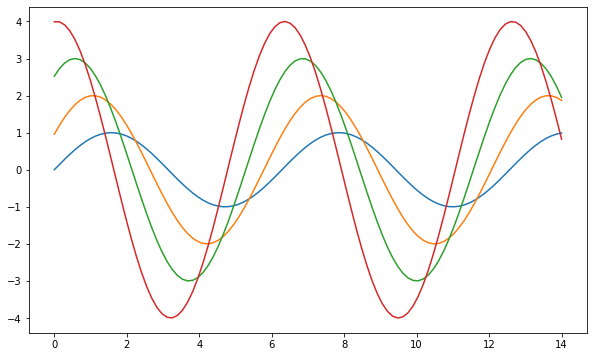

In [73]:
x = np.linspace(0, 14, 100)
y1 = np.sin(x)
y2 = 2*np.sin(x+0.5)
y3 = 3*np.sin(x+1.0)
y4 = 4*np.sin(x+1.5)

plt.figure(figsize=(10,6))
plt.plot(x, y1, x,y2, x,y3, x,y4)

#### seaborn - whitegrid적용

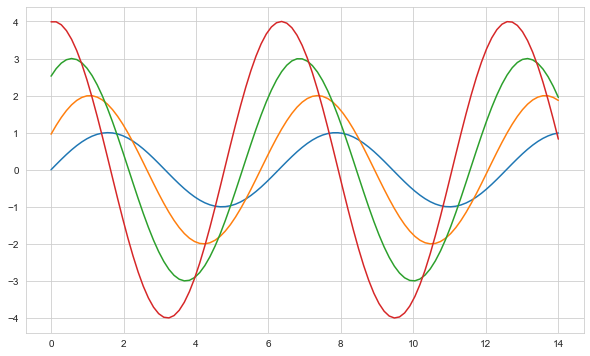

In [74]:
sns.set_style('whitegrid')

plt.figure(figsize=(10,6))
plt.plot(x, y1, x,y2, x,y3, x,y4)


#### seaborn 자체 데이터로 연습하기

In [75]:
# tips 데이터 - 요일별 점심, 저녁, 흡연 여부와 식사금액과 팁을 정리한 데이터
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### boxplot보기

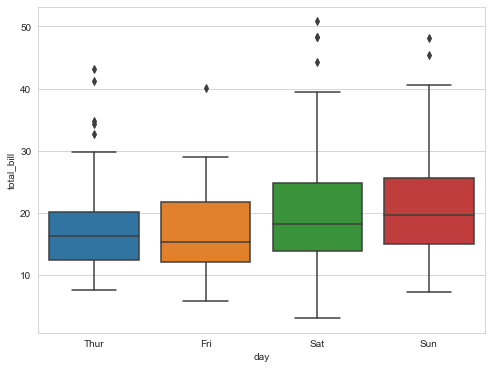

In [76]:
plt.figure(figsize=(8,6))
sns.boxplot(x='day', y='total_bill', data=tips)

In [77]:
tips.day.value_counts()
# 4개뿐

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

#### hue라는 인자로 구분하기

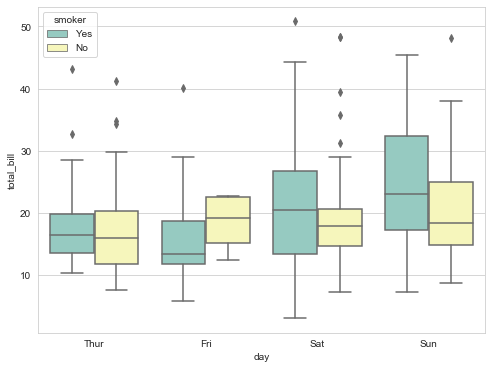

In [78]:
plt.figure(figsize=(8,6))
# 흡연 여부로 분류하여 플로팅 --> 흡연자가 금액의 범위가 대체로 크다.
# hue에 범주형 데이터를 주면, 범주에 따라 다르게 시각화 함.
sns.boxplot(x='day', y='total_bill', data=tips, hue='smoker' ,palette='Set3')


#### lmplot으로 선형 그래프 그리기
### lmplot --> scatter처럼 데이터 분포, 직선으로 regression결과 + 유효범위 잡아줌.

C:\Users\101\.conda\envs\python_lecture\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


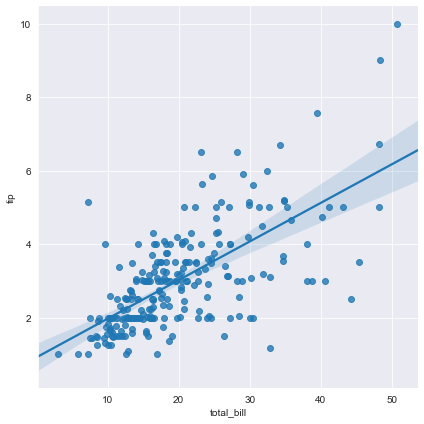

In [79]:
sns.set_style("darkgrid")
sns.lmplot(x='total_bill', y ='tip', data=tips, size=6)
plt.show()

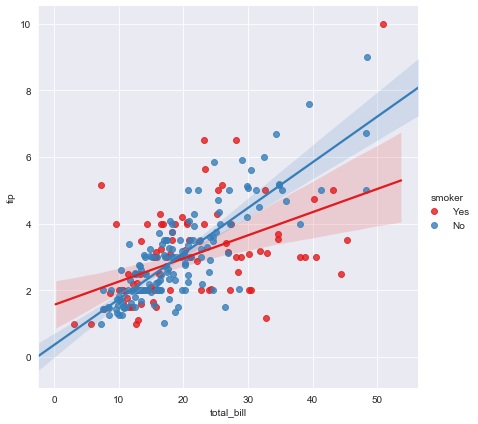

In [80]:
#pallete->색상지정
sns.lmplot(x='total_bill', y='tip', data=tips, size=6, hue="smoker", palette="Set1")

### 비행기 데이터 p.101

In [81]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [82]:
flights.pivot?

In [83]:
# index columns, value
flights = flights.pivot("month", "year", 'passengers')


In [84]:
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


#### seaborn heatmap -데이터 경향 파악

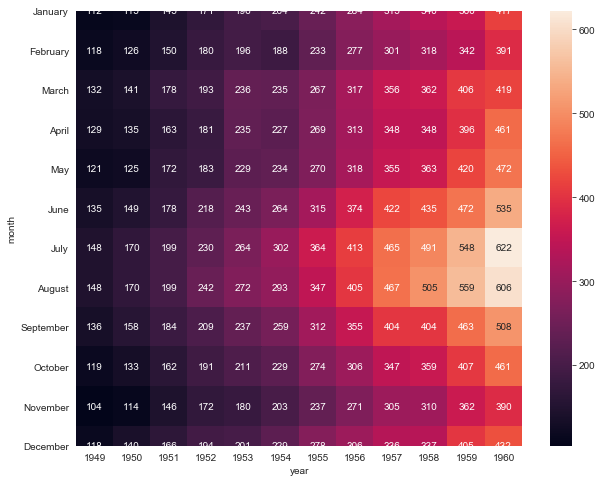

In [85]:

plt.figure(figsize=(10,8))
# annot: 개수 표현 여부, 
sns.heatmap(flights, annot=True, fmt='d') #얼마나 많은지 분포도 파악 : fmt: 정수 (d) : annot: 숫자 표시 여부

In [86]:
sns.heatmap?

#### Iris 데이터 - p.102

In [87]:

sns.set(style='ticks')
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


##### PairPlot그리기

In [88]:
sns.pairplot?

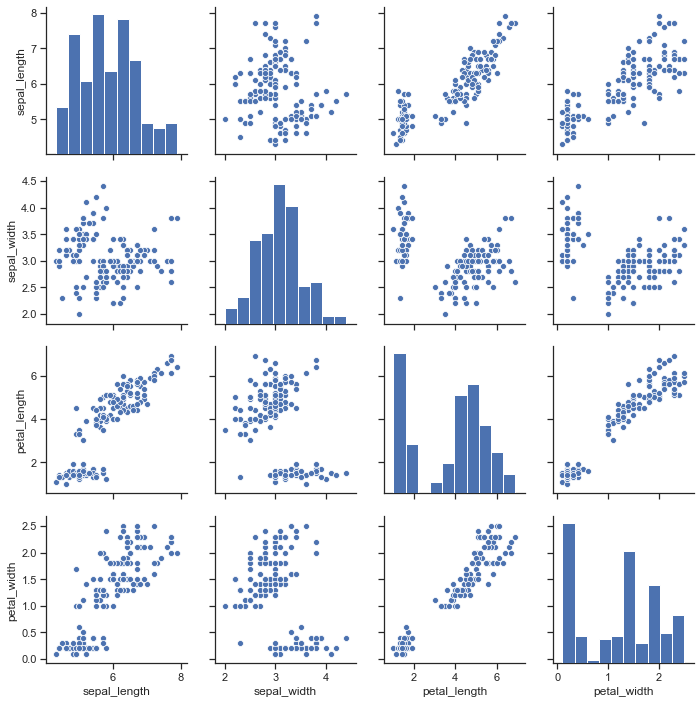

In [89]:
sns.pairplot(iris)

#### hue 파라미터로 구분하기 

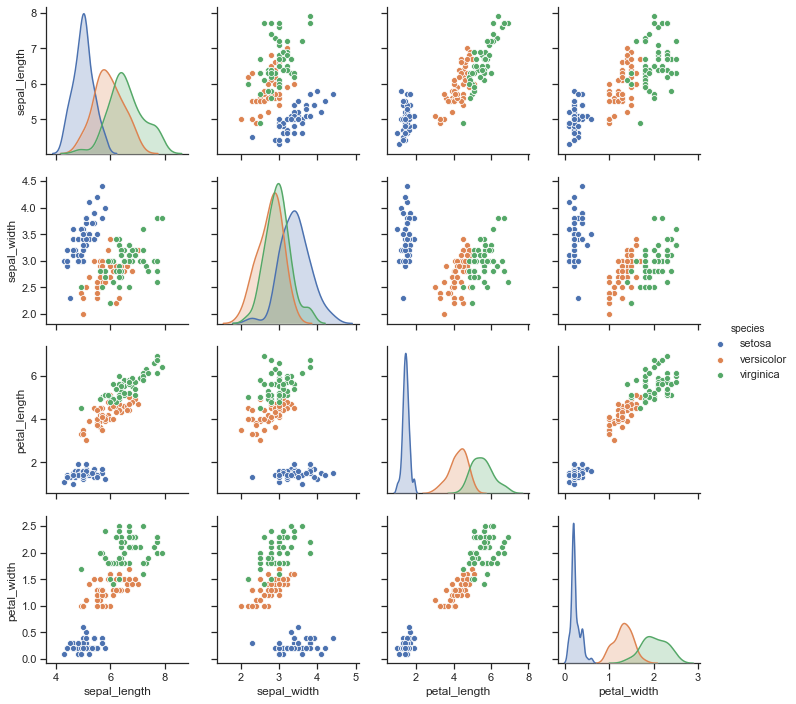

In [90]:

sns.pairplot(iris, hue="species")
# 범주형 데이터로 설계

In [91]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


##### variable을 줘서 그리기

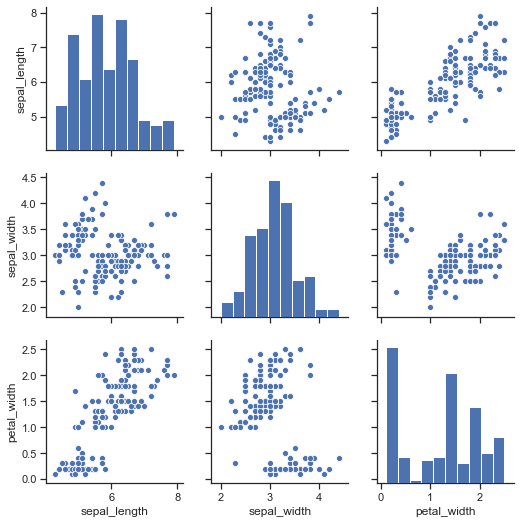

In [92]:
sns.pairplot(iris, vars=['sepal_length', 'sepal_width','petal_width'])

##### regression 함께 그리기

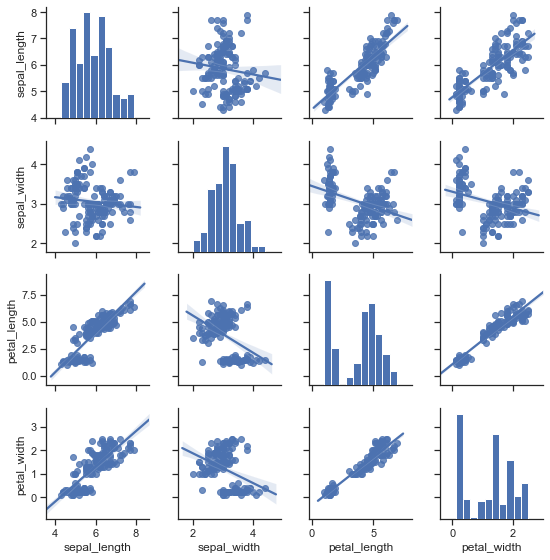

In [93]:
# sns.pairplot(iris, kind='reg',size=3)
sns.pairplot(iris, kind='reg', height=2)

#### x와 y의 변수 다르게 줘서 pairplot 그리기

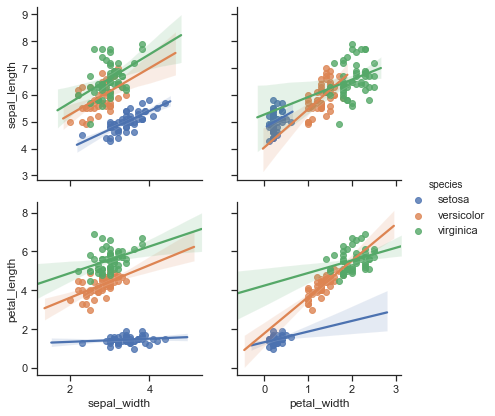

In [94]:
sns.pairplot(iris, kind='reg', x_vars=['sepal_width', 'petal_width'], y_vars=['sepal_length', 'petal_length'], hue='species', height=3)

## 2-8. 범죄 데이터 시각화 하기 p.104

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [96]:
# 한글화 하기
import platform 
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin': # mac
    font_name = 'AppleGothic'
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
else:
    print("지원하지 않음.")
rc('font', family=font_name)

### 연습문제1. - crime_anal_norm을 [강도, 살인,폭력]에 대한 상관관계를 pairplot을 이용해  분석하시오. ( regression그래프와 함께 그리시오)

### 연습문제2. pariplot을 x변수는 ['인구수', 'cctv'], y변수는 ['살인검거율', '폭력검거율'] 로 하고 pairplot을 regression 그래프와 함께 그리시오.

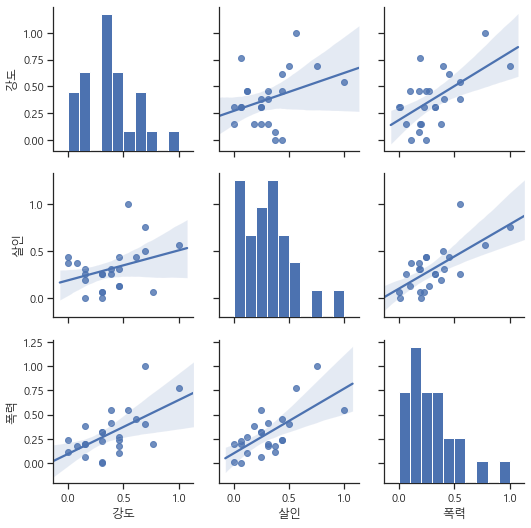

In [97]:
# 연습문제1.
sns.pairplot(crime_anal_norm, vars=['강도', '살인', '폭력'], kind='reg')

강도 살인 폭력을 모두 양의 상관관계를 보임을 알 수 있다.

In [98]:
crime_anal_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 강남구 to 중랑구
Data columns (total 14 columns):
강간       24 non-null float64
강도       24 non-null float64
살인       24 non-null float64
절도       24 non-null float64
폭력       24 non-null float64
강간검거율    24 non-null float64
강도검거율    24 non-null float64
살인검거율    24 non-null float64
절도검거율    24 non-null float64
폭력검거율    24 non-null float64
CCTV     24 non-null int64
인구수      24 non-null int64
범죄       24 non-null float64
검거       24 non-null float64
dtypes: float64(12), int64(2)
memory usage: 3.4+ KB


In [99]:
crime_anal_norm

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,CCTV,인구수,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,1.000000,0.5625,0.955307,0.775993,87.166667,71.428571,100.000000,43.841545,85.791506,5221,549043,4.293800,388.228288
강동구,0.117043,0.461538,0.1250,0.315428,0.272507,84.117647,100.000000,100.000000,50.495050,84.127698,1879,430522,1.291516,418.740394
강북구,0.154004,0.461538,0.4375,0.142243,0.241588,71.808511,100.000000,75.000000,54.226619,93.873704,1265,317875,1.436874,394.908833
관악구,0.490760,0.692308,0.5000,0.529007,0.399515,86.647727,100.000000,100.000000,50.944334,87.097995,3985,519953,2.611590,424.690056
광진구,0.238193,0.076923,0.3750,0.424581,0.176720,80.349345,50.000000,71.428571,55.059356,85.167715,1581,368337,1.291417,342.004987
구로구,0.281314,0.615385,0.4375,0.402235,0.454986,72.400000,100.000000,100.000000,45.835760,83.262562,3227,439850,2.191420,401.498322
금천구,0.178645,0.461538,0.3125,0.166309,0.177933,92.500000,85.714286,100.000000,55.222603,90.219665,1634,252868,1.296924,423.656554
노원구,0.166324,0.307692,0.2500,0.275462,0.320097,89.175258,100.000000,80.000000,41.139241,82.234355,1906,539829,1.319576,392.548854
도봉구,0.000000,0.307692,0.0000,0.000000,0.007275,100.000000,60.000000,100.000000,55.185659,83.320979,858,337594,0.314967,398.506638


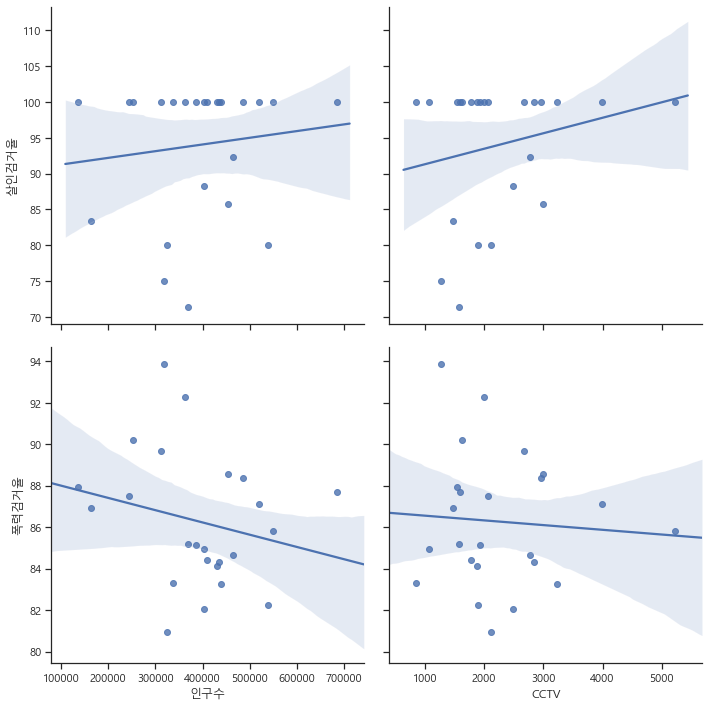

In [100]:
# 음의 상관관계 관찰. [인구수와 검거율, CCTV와 검거율]
sns.pairplot(crime_anal_norm, x_vars=['인구수', 'CCTV'], y_vars=['살인검거율', '폭력검거율'], kind='reg', height=5)

In [101]:
# 검거율의 합계를 100으로 한정 짓기. --> 정규화 일종.
tmp_max = crime_anal_norm['검거'].max() 
crime_anal_norm['검거'] = crime_anal_norm['검거']/tmp_max * 100

# 정렬
crime_anal_norm_sort = crime_anal_norm.sort_values(by="검거", ascending=False)
crime_anal_norm_sort

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,CCTV,인구수,범죄,검거
구별,,,,,,,,,,,,,,
은평구,0.154004,0.000000,0.4375,0.213580,0.239467,89.893617,100.000000,100.000000,63.849765,88.368794,2962,486159,1.044550,100.000000
중랑구,0.125257,0.153846,0.1875,0.320155,0.380721,83.333333,100.000000,100.000000,57.404980,84.967067,1068,403776,1.167479,96.288997
관악구,0.490760,0.692308,0.5000,0.529007,0.399515,86.647727,100.000000,100.000000,50.944334,87.097995,3985,519953,2.611590,96.059344
금천구,0.178645,0.461538,0.3125,0.166309,0.177933,92.500000,85.714286,100.000000,55.222603,90.219665,1634,252868,1.296924,95.825579
양천구,0.566735,0.692308,0.7500,1.000000,1.000000,91.773779,100.000000,92.307692,52.380952,84.645329,2775,463931,4.009043,95.249074
성동구,0.026694,0.307692,0.0625,0.093683,0.000000,80.952381,100.000000,100.000000,48.748749,89.660377,2679,311290,0.490569,94.854096
강동구,0.117043,0.461538,0.1250,0.315428,0.272507,84.117647,100.000000,100.000000,50.495050,84.127698,1879,430522,1.291516,94.713608
송파구,0.402464,0.384615,0.2500,0.675118,0.548651,82.200647,100.000000,100.000000,43.962585,87.687400,1586,684338,2.260849,93.607608
동대문구,0.065708,0.307692,0.0625,0.286205,0.229160,77.241379,80.000000,100.000000,64.270905,92.263335,2003,363779,0.951266,93.590641


Text(0.5, 1, '범죄 검거 비율 (정규화된 검거의 합)')

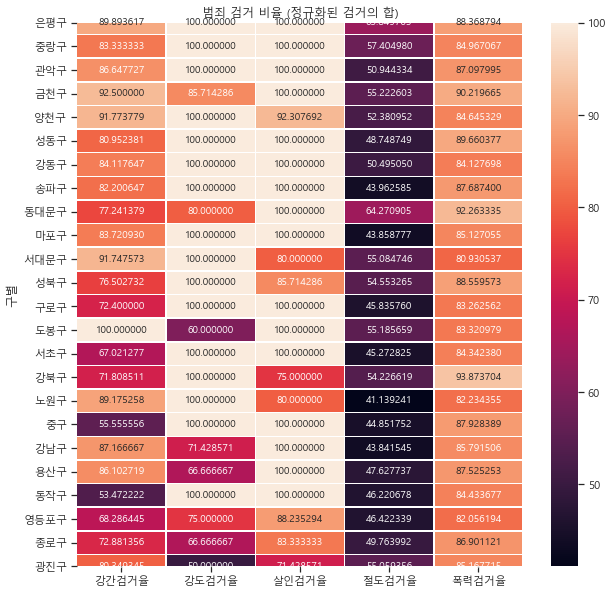

In [102]:
target_col = col2

crime_anal_norm_sort = crime_anal_norm.sort_values(by="검거", ascending=False)

plt.figure(figsize = (10, 10))
sns.heatmap(crime_anal_norm_sort[target_col], annot=True, fmt='f', linewidths=.5)
plt.title("범죄 검거 비율 (정규화된 검거의 합)")


#### 눈에 띄는 데이터는? 
절도검거율, 살인검거율

### 연습문제 - 범죄비율을 히트맵으로 표현하시오.

In [103]:
target_col = col.copy() + ['범죄']
target_col

['강간', '강도', '살인', '절도', '폭력', '범죄']

In [104]:
crime_anal_norm['범죄'] = crime_anal_norm['범죄']/5 # 5개를 더해 만들었으니, 스케일링

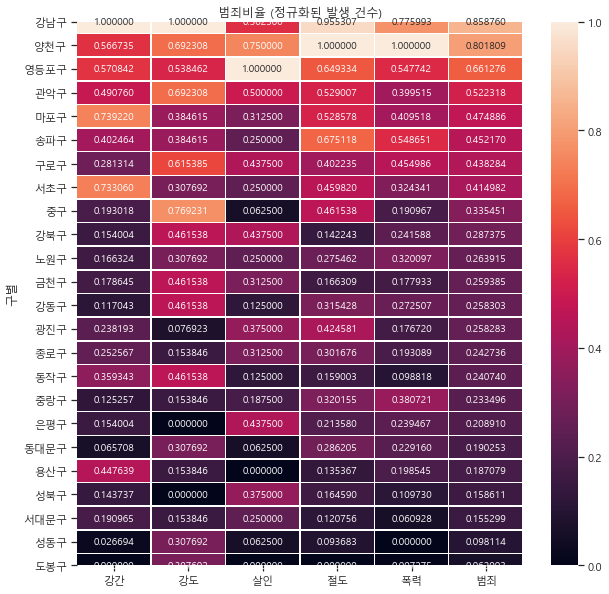

In [105]:
crime_anal_norm_sort = crime_anal_norm.sort_values(by="범죄", ascending=False)
plt.figure(figsize = (10,10))
sns.heatmap(crime_anal_norm_sort[target_col], annot=True, fmt='f', linewidth=.5)
plt.title("범죄비율 (정규화된 발생 건수)")
plt.show()

양천구, 강남구가 압도적으로 높다.
영등포구에서 살인이 많다.
송파구는 절도가 많다. 성동구는 범죄가 가장 적다.

#### 결과 파일 저장.

In [106]:
filedir, file

('data/analysis_crime_seoul', '2018년.csv')

In [109]:
if not os.path.exists(filedir+'/norm'):
    os.makedirs(filedir+'/norm')

In [110]:
crime_anal_norm_filename = "{}/{}/{}".format(filedir, "norm", file)

In [111]:
crime_anal_norm.to_csv(crime_anal_norm_filename, sep=',', encoding='utf-8')

## 2-9. 지도 시각화 도구 Folium

In [154]:
import folium

In [155]:
try:
    import folium
except ModuleNotFoundError:
    !pip install folium
    import folium

In [115]:
# !pip install folium 
# anaconda package 아님
# or
# conda activate (환경이름)
# pip install folium

In [156]:
map_osm = folium.Map(location=[45.5236, -122.6750], zoom_start=10, tiles="Stamen Toner")
map_osm

#### folium (Map, Marker, Circle, CircleMarker) + add_to(map)

In [157]:
map2 = folium.Map(location=[37.5502,126.982], tiles="Stamen Toner", zoom_start=13)
folium.Marker([37.5572,126.902], popup='The Waterfront').add_to(map2)

folium.Circle([37.5522,126.932], radius=70, popup='Laurelfurst Park').add_to(map2)
folium.CircleMarker([37.5402,126.882], radius=40, popup='Laurelfurst Park',color="#3186cc",
                    fill_color='#3186cc').add_to(map2)
map2

In [158]:
import folium
import pandas as pd

state_unemployment = './data/02. folium_US_Unemployment_Oct2012.csv'

state_data = pd.read_csv(state_unemployment)
state_data.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


In [160]:
state_geo = './data/02. folium_us-states.json'

In [165]:
import json

with open(state_geo, 'r') as f:
    data = f.read()

In [166]:
data

'{"type":"FeatureCollection","features":[\n{"type":"Feature","id":"AL","properties":{"name":"Alabama"},"geometry":{"type":"Polygon","coordinates":[[[-87.359296,35.00118],[-85.606675,34.984749],[-85.431413,34.124869],[-85.184951,32.859696],[-85.069935,32.580372],[-84.960397,32.421541],[-85.004212,32.322956],[-84.889196,32.262709],[-85.058981,32.13674],[-85.053504,32.01077],[-85.141136,31.840985],[-85.042551,31.539753],[-85.113751,31.27686],[-85.004212,31.003013],[-85.497137,30.997536],[-87.600282,30.997536],[-87.633143,30.86609],[-87.408589,30.674397],[-87.446927,30.510088],[-87.37025,30.427934],[-87.518128,30.280057],[-87.655051,30.247195],[-87.90699,30.411504],[-87.934375,30.657966],[-88.011052,30.685351],[-88.10416,30.499135],[-88.137022,30.318396],[-88.394438,30.367688],[-88.471115,31.895754],[-88.241084,33.796253],[-88.098683,34.891641],[-88.202745,34.995703],[-87.359296,35.00118]]]}},\n{"type":"Feature","id":"AK","properties":{"name":"Alaska"},"geometry":{"type":"MultiPolygon","co

In [167]:
d = json.loads(data)
d

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': 'AL',
   'properties': {'name': 'Alabama'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-87.359296, 35.00118],
      [-85.606675, 34.984749],
      [-85.431413, 34.124869],
      [-85.184951, 32.859696],
      [-85.069935, 32.580372],
      [-84.960397, 32.421541],
      [-85.004212, 32.322956],
      [-84.889196, 32.262709],
      [-85.058981, 32.13674],
      [-85.053504, 32.01077],
      [-85.141136, 31.840985],
      [-85.042551, 31.539753],
      [-85.113751, 31.27686],
      [-85.004212, 31.003013],
      [-85.497137, 30.997536],
      [-87.600282, 30.997536],
      [-87.633143, 30.86609],
      [-87.408589, 30.674397],
      [-87.446927, 30.510088],
      [-87.37025, 30.427934],
      [-87.518128, 30.280057],
      [-87.655051, 30.247195],
      [-87.90699, 30.411504],
      [-87.934375, 30.657966],
      [-88.011052, 30.685351],
      [-88.10416, 30.499135],
      [-88.137022, 30.318396],
    

#### choropleth

In [123]:

map = folium.Map(location=[40, -98], zoom_start=4)
map.choropleth(geo_data=state_geo, data = state_data,
               columns=['State','Unemployment'],
               key_on='feature.id',
               fill_color='YlGn',
               legend_name='Unemployment Rate(%)')
map

C:\Users\101\.conda\envs\python_lecture\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [168]:
import json
geo_path = './data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [169]:
geo_str

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': '강동구',
   'properties': {'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.11519584981606, 37.557533180704915],
      [127.16683184366129, 37.57672487388627],
      [127.18408792330152, 37.55814280369575],
      [127.16530984307447, 37.54221851258693],
      [127.14672806823502, 37.51415680680291],
      [127.12123165719615, 37.52528270089],
      [127.1116764203608, 37.540669955324965],
      [127.11519584981606, 37.557533180704915]]]}},
  {'type': 'Feature',
   'id': '송파구',
   'properties': {'code': '11240',
    'name': '송파구',
    'name_eng': 'Songpa-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.0690698130372, 37.522279423505026],
      [127.10087519791962, 37.524841220167055],
      [127.1116764203608, 37.540669955324965],
      [127.12123165719615, 37.52528270089

In [127]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='Stamen Toner')

# json파일에서 구역별 지리 위치 정보 가져옴. 표기할 데이터와 columns
# key_on : 나타날 구역별 id를 설정
map.choropleth(geo_data=geo_str, data=crime_anal_norm['살인'],
               colums=[crime_anal_norm.index, crime_anal_norm['살인']],
               fill_color='PuRd', key_on='feature.id')
map

In [128]:
# 인구대뷔 범죄발생율 확인
tmp_criminal = crime_anal_norm['살인'] / crime_anal_norm['인구수'] * 10000
map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='Stamen Toner')

map.choropleth(geo_data=geo_str, data=tmp_criminal,
               columns=[crime_anal.index, tmp_criminal],
               fill_color='PuRd', #PuRd, YlGnBu,
               key_on='feature.id')
map

## 2-11 서울시 경찰서별 검거율과 구별 범죄 발생율을 동시에 시각화

### 연습문제. 서울시 경찰서별 검거율, 구별 범죄 발생율 시각화

## 2-11 서울시 경찰서별 검거율과 구별 범죄 발생율을 동시에 시각화

In [145]:
crime_anal_raw = crime_anal_police.copy()

In [170]:
crime_anal_raw.head(1)

,구분,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거,구별,lat,lng,검거
0,서울중부경찰서,1,1,5,7,132,63,1057,415,1176,1010,중구,37.5635144,126.9896139,1.483201


In [171]:
# 서별 검거율, 구별 범죄 발생율 구한 뒤 데이터 두개를 Map에 중첩표현
crime_anal_raw['lat'] = station_lat
crime_anal_raw['lng'] = station_lng

col = ['살인검거','강도검거','강간검거','절도검거','폭력검거']
tmp = crime_anal_raw[col] / crime_anal_raw[col].max()

crime_anal_raw['검거'] = np.sum(tmp,axis=1)
crime_anal_raw.head()

,구분,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거,구별,lat,lng,검거
0,서울중부경찰서,1,1,5,7,132,63,1057,415,1176,1010,중구,37.5635144,126.9896139,1.483201
1,서울종로경찰서,5,4,1,0,136,114,744,398,1131,993,종로구,37.5755321,126.9849292,1.289828
2,서울남대문경찰서,1,1,6,4,75,52,798,417,779,709,중구,37.5547667,126.9734874,1.133523
3,서울서대문경찰서,5,4,3,3,206,189,1062,585,1526,1235,서대문구,37.5649018,126.9667850,1.957291
4,서울혜화경찰서,1,1,2,2,100,58,739,340,831,712,종로구,37.5718764,126.9989318,0.934541


In [172]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for n in crime_anal_raw.index:
  folium.Marker([crime_anal_raw['lat'][n],
                 crime_anal_raw['lng'][n]], popup=crime_anal_raw['구분'][n]).add_to(map)

map

In [173]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

# 적합한 값을 곱해서 검거율을 원의 넓이로 구분이 되도록 표현
# 원이 클수록 검거율이 높다
for n in crime_anal_raw.index:
  folium.CircleMarker([crime_anal_raw['lat'][n],
                 crime_anal_raw['lng'][n]],
                 radius=crime_anal_raw['검거'][n]*10,
                 color='#3186cc',fill_color='#3186cc', popup=crime_anal_raw['구분'][n]).add_to(map)

map

In [153]:
map = folium.Map(location=[37.5502, 126.982],zoom_start=11)

map.choropleth(geo_data=geo_str, data=crime_anal_norm['범죄'],
               columns=[crime_anal_norm.index, crime_anal_norm['범죄']],
               fill_color='PuRd', #PuRd, YlGnBu,
               key_on = 'feature.id')

# add_to()를 통해서 circlemarker를 구역별 표시가 된 map에 추가.
for n in crime_anal_raw.index:
  folium.CircleMarker([crime_anal_raw['lat'][n],crime_anal_raw['lng'][n]],
                      radius=crime_anal_raw['검거'][n]*10,
                      color='#3186cc', fill_color='#3186cc').add_to(map)

map

C:\Users\101\.conda\envs\python_lecture\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


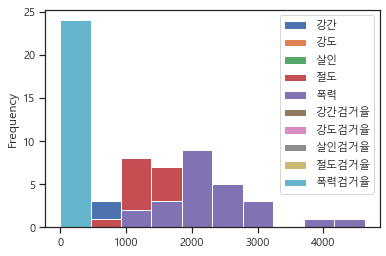

In [175]:
crime_anal.plot.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A417209508>,
      dtype=object)

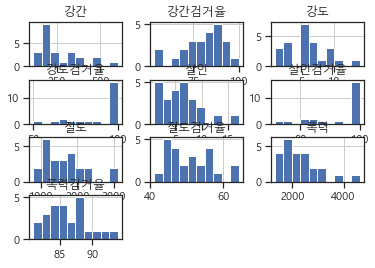

In [176]:
crime_anal.hist()